# Adaline with minibatch SGD
---


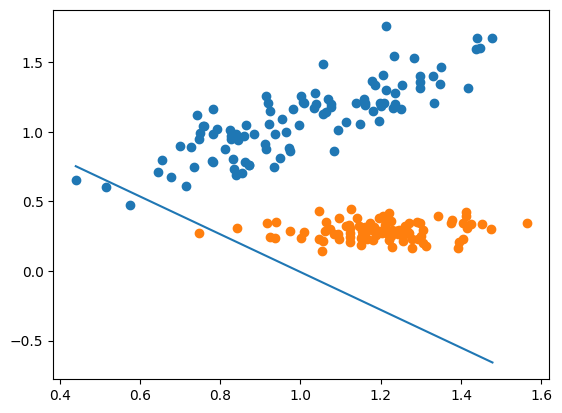

In [3]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

N = 100

# generating the points for the first class
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)

# generating the points for the second class
X2_1 = X1_1 + np.random.normal(loc=0, scale=0.15, size=N) + 0.1
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3

# we need the coordinate X0 for the bias term
X0 = np.ones(N * 2)

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

# generating the labels 1, -1 to associate to the data
Y1 = np.ones(N)
Y2 = -np.ones(N)

X = np.stack((X0, X1, X2), axis=1)
Y = np.concatenate((Y1, Y2))

# generate w_0,....,w_n
W = np.random.uniform(low=-1, size=3)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

plt.plot(
    [np.min(X1_1), np.max(X1_1)],
    [
        np.min(X1_1) * (-W[1] / W[2]) - (W[0] / W[2]),
        np.max(X1_2) * (-W[1] / W[2]) - (W[0] / W[2]),
    ],
)


[-0.4805838  -0.85700871  2.04797363]
# of epochs =  0


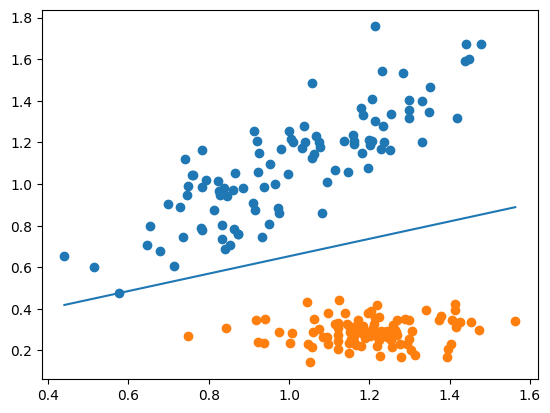

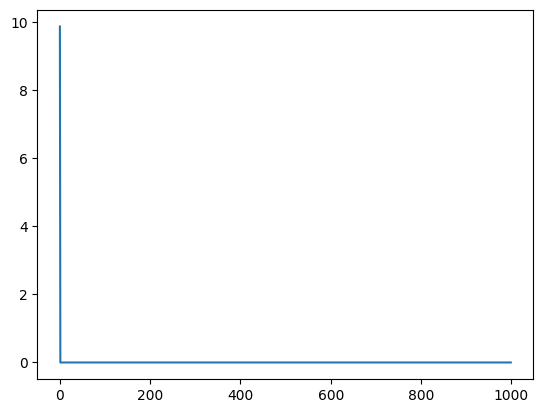

In [6]:
def error_sse(errors):
    return np.sum(np.square(errors)) / 2


# set learning rate 0 < eta < 1
eta = 0.001
# check epochs
epochs = 0
# set maximum epochs
max_epochs = 1000
# track total error per epoch
total_error = np.zeros(max_epochs)

while (epochs < max_epochs):
    # compute current output
    adaline_output = np.dot(X, W)
    # compute error for each data point
    errors = Y - adaline_output
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    # check if a solution is found
    if all(adaline_output * Y > 0):
        break
    else:
        # shuffle objects if we have an error. this is called mini-batch learning in deep learning
        rand_perm = np.random.permutation(range(Y.shape[0]))
        # apply permutation and update weights
        for xi, yi in zip(X[rand_perm, :], Y[rand_perm]):
            error = (yi - np.dot(xi, W))
            # update with w = w + delta_w
            delta_w = eta * 2 * xi * error
            W = W + delta_w
    
    epochs += 1
    
print(W)
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-W[1]/W[2]) - W[0]/W[2], np.max(X1) * (-W[1]/W[2]) - W[0]/W[2]])
plt.figure()
plt.plot(range(max_epochs), total_error)